In [9]:
import pandas as pd

# 1, 2, og 3

schrooms = pd.read_csv('agaricus-lepiota.data')

schrooms.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# 4

schrooms.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Oppgave 4: 
Edibility er definert av en bools variable, true/false, edible poisonous. 
Oppgaveteksten nevner habitat, ønsker også å ta med "spore-print-color", da det umidelbart ser ut som en sammenheng med spisbarhet

In [11]:
schrooms[['habitat', 'edibility', 'spore-print-color' ]].groupby('habitat').describe()

edibility                  spore-print-color                 
            count unique top  freq             count unique top  freq
habitat                                                              
d            3148      2   e  1880              3148      5   n  1008
g            2148      2   e  1408              2148      5   k   624
l             832      2   p   592               832      5   w   640
m             292      2   e   256               292      3   n   128
p            1144      2   p  1008              1144      4   w   616
u             368      2   p   272               368      3   h   144
w             192      1   e   192               192      1   w   192

In [12]:
schrooms[['habitat', 'edibility', 'spore-print-color' ]].groupby('habitat').describe().transpose()

habitat                      d     g    l    m     p    u    w
edibility         count   3148  2148  832  292  1144  368  192
                  unique     2     2    2    2     2    2    1
                  top        e     e    p    e     p    p    e
                  freq    1880  1408  592  256  1008  272  192
spore-print-color count   3148  2148  832  292  1144  368  192
                  unique     5     5    5    3     4    3    1
                  top        n     k    w    n     w    h    w
                  freq    1008   624  640  128   616  144  192

In [13]:
schrooms[['habitat', 'edibility', 'spore-print-color' ]].groupby('spore-print-color').describe().transpose()

spore-print-color   b     h     k     n   o   r   u     w   y
habitat   count    48  1632  1872  1968  48  72  48  2388  48
          unique    1     4     5     6   1   2   1     5   1
          top       l     g     d     d   l   g   d     d   l
          freq     48   576   960  1008  48  36  48   652  48
edibility count    48  1632  1872  1968  48  72  48  2388  48
          unique    1     2     2     2   1   1   1     2   1
          top       e     p     e     e   e   p   e     p   e
          freq     48  1584  1648  1744  48  72  48  1812  48

Ser en sterk sammenheng mellom spore-print-color og spore-print-color og spisbarhet. Det er også en sammenheng mellom spisbarhet og habitat. Se på "freq" opp mot "count". Enten er "freq" nær "count", eller nær null. 

For oppsummering, hvor freq beskriver antallet av det mest vanlige utfallet, i et habitat: 
    b = 57% e
    h = 66% e
    k = 71% p 
    m = 88% e
    p = 88% p
    u = 74% p
    w = 100% e

In [14]:
# 5

dummies = pd.get_dummies(schrooms)
dummies.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


array([[<AxesSubplot:title={'center':'edibility_e'}>,
        <AxesSubplot:title={'center':'edibility_p'}>],
       [<AxesSubplot:title={'center':'population_s'}>,
        <AxesSubplot:title={'center':'population_v'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

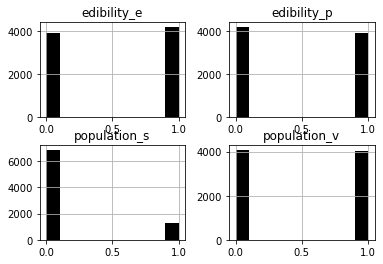

In [15]:
import matplotlib.pyplot as plt
plt.figure()
dummies[["edibility_e", "edibility_p", "population_s", "population_v"]].hist(color='k', alpha=1)



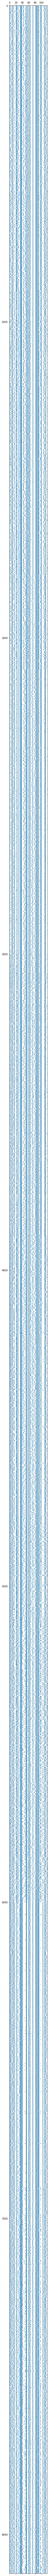

In [16]:
plt.figure(figsize=(200,200)) 
plt.spy(dummies, markersize=1) 
plt.show()